# MIS550: Week 4 Assessment

Two data sets are provided in this week’s content: [Social Climbers.xlsx](https://docs.google.com/spreadsheets/d/147uFyy4ilCy9Kf1EBUCKXs0ES_F0ZZGe/edit?usp=sharing&ouid=114900977757724376901&rtpof=true&sd=true) and [Artsy Lawsuit.xslx](https://docs.google.com/spreadsheets/d/1jlRXskM5v4QN3IXQPitwl8jLz4GIel61/edit?usp=sharing&ouid=114900977757724376901&rtpof=true&sd=true). Use these data sets to perform the following tasks within the spreadsheets:

**Social Climbers**

- Compare the data to determine where relationships may exist. For example, you may ask if there is a relationship between education and income levels. Perform at least four different data comparisons.
- Provide an explanation based on your comparison results. Where do relationships exist and where do they not exist, according to the data?

**Artsy Lawsuit**

- The story behind these data comes from a discrimination lawsuit filed, accusing the Artsy company of improper hiring processes and employment pay between men and women. Your task is to use these data to determine if the plaintiffs have a valid or strong case, which would then be presented in court to a jury.
- Use basic statistical analysis to compare the data.

In both of these data sets, you may choose to use the tools below or any others you feel are appropriate to tell the story and interpret the data. Not all tests are applicable for all data sets. It depends on the types of data and what you want to know.

In [41]:
import pandas as pd
import matplotlib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

## Social Climbers
First, we will be analyzing the `Social Climbers` dataset. This dataset includes measurement of the importance of social status given by couples. The dataset contains information on the education level, salary, cars, home value, savings, and social climber index of each couple.<br>

**Couple**: ID of the couple <br>
**EducLevel**: Education level of the couple (1-4)
1: High school only
2: Undergraduate degree
3: Master's degree
4: Doctorate <br>
**Salary**: Combined annual salary of the husband and wife <br>
**Cars**: Value of the couple's cars <br>
**Home**: Value of the couple's home <br>
**Savings**: Level of savings (stocks, bonds, etc.) <br>
**SCIndex**: Social climber index (scale of 1-10, where 1 means very unconcerned about social status and 10 means very concerned) <br>

Our goal is to identify relationships between variables, determine their presence or absence, and provide explanations. To achieve this, we will perform a minimum of four data comparisons. <br>

Let's get started.


In [42]:
# Load the dataset
social_climbers_df = pd.read_csv('../data/social_climbers.csv')

In [43]:
# Check the first few rows
print(social_climbers_df.head())

# Check the data types
print(social_climbers_df.dtypes)

# Check the summary statistics
print(social_climbers_df.describe())

   Couple  EducLevel  Salary  Cars  Home  Savings  SCIndex
0       1          4      90    19    83      289        3
1       2          2      95    35   134     1130        3
2       3          2      99    46   110      583        5
3       4          3     130    24    69     1049        7
4       5          4     126    42   153      612        7
Couple       int64
EducLevel    int64
Salary       int64
Cars         int64
Home         int64
Savings      int64
SCIndex      int64
dtype: object
           Couple   EducLevel      Salary        Cars        Home  \
count  274.000000  274.000000  274.000000  274.000000  274.000000   
mean   137.500000    2.835766   98.120438   40.193431  146.160584   
std     79.241193    0.932933   24.948373   10.254410   58.255624   
min      1.000000    1.000000   25.000000    9.000000   50.000000   
25%     69.250000    2.000000   82.250000   34.000000  104.000000   
50%    137.500000    3.000000   99.000000   40.000000  144.000000   
75%    205.75000

We have indentified and selected the following hypothesis statements for analysis:

1. **Education level affects salary and savings**: <br> Couples with higher education levels have higher salaries and savings compared to those with lower education levels. <br><br>
2. **Higher salaries are associated with more cars and larger homes**: <br>Couples with higher salaries tend to own more cars and have larger homes. <br><br>
3. **Higher education levels are associated with higher SCIndex scores**: <br>Couples with higher education levels are more likely to have higher Social Climbers Index (SCIndex) scores, indicating a higher social status.<br><br>
4. **Higher salaries are associated with higher SCIndex scores**: <br>Couples with higher salaries are more likely to have higher SCIndex scores, indicating a higher social status.<br>

### 1. Education level affects salary and savings

In [44]:
# The fact that the salary value is lower than the savings suggests that the salary is given on a monthly basis, 
# while the savings are given on a yearly basis.
# To make a better comparison, we need to convert them into the same time frame.
social_climbers_df['YearlySalary'] = social_climbers_df['Salary'] * 12

# Create a bar chart with education level on the x-axis, salary and savings on the y-axis, and SCIndex as the color
fig = px.bar(social_climbers_df, x='EducLevel', y=['YearlySalary', 'Savings'], barmode='group')

# Add axis labels and a title
fig.update_layout(xaxis_title='Education Level', yaxis_title='Amount', title='Yearly Salary and Savings by Education Level')

# Show the plot
fig.show()

In [45]:
# Calculate the correlation coefficients between education level, salary, and savings
corr_matrix = social_climbers_df[['EducLevel', 'YearlySalary', 'Savings']].corr()

# Print the correlation matrix
print(corr_matrix)

              EducLevel  YearlySalary   Savings
EducLevel      1.000000       0.38218 -0.486429
YearlySalary   0.382180       1.00000 -0.162160
Savings       -0.486429      -0.16216  1.000000


The correlation matrix shows the correlation coefficients between the variables in the dataset. The correlation coefficient ranges from `-1` to `1`, where `-1` indicates a perfect negative correlation, `0` indicates no correlation, and `1` indicates a perfect positive correlation. <br><br>
The correlation coefficient between education level and yearly salary is `0.38218`, indicating a positive correlation between the two variables. This means that couples with higher education levels tend to have higher yearly salaries. The correlation coefficient between education level and yearly savings is `-0.486429`, indicating a negative correlation between the two variables. This means that couples with higher education levels tend to have lower yearly savings. The correlation coefficient between yearly salary and yearly savings is -`0.16216`, indicating a weak negative correlation between the two variables. This means that couples with higher yearly salaries tend to have lower yearly savings. <br><br>
Theis suggests that education level has a stronger relationship with yearly salary than with yearly savings. However, the negative correlation between education level and yearly savings suggests that couples with higher education levels may prioritize spending over saving.


### 2. Higher salaries are associated with more cars and larger homes

In [46]:
# Create a new column for salary range
social_climbers_df['Salary Range'] = pd.cut(social_climbers_df['Salary'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180],
                            labels=['0-20k', '20-40k', '40-60k', '60-80', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k'])

# Group the data by salary range and calculate the mean of cars and home values for each group
grouped_df = social_climbers_df.groupby('Salary Range').mean()[['Cars', 'Home']]

# Reset the index to make salary range a column
grouped_df = grouped_df.reset_index()

# Create the plot
fig = px.bar(grouped_df, x='Salary Range', y=['Cars', 'Home'], barmode='group',
             title='Mean Cars and Home Values by Salary Range')
fig.update_layout(xaxis_title='Salary Range', yaxis_title='Mean Value')
fig.show()

In [47]:
# Calculate the correlation coefficients between Salary, cars, and home
corr_matrix = social_climbers_df[['Salary', 'Cars', 'Home']].corr()

print(corr_matrix)

          Salary      Cars      Home
Salary  1.000000  0.542406  0.480883
Cars    0.542406  1.000000  0.607065
Home    0.480883  0.607065  1.000000


We can observe that as salary increases, the value of cars and home also increase. <br>
However, the correlation between salary and home is weaker than the correlation between salary and cars. <br>

### 3. Higher education levels are associated with higher SCIndex scores

In [48]:
# Group the data by education level and calculate the mean, median, and standard deviation of SCIndex for each group
grouped_df = social_climbers_df.groupby('EducLevel')['SCIndex'].agg(['mean', 'median', 'std'])

# Reset the index to make education level a column
grouped_df = grouped_df.reset_index()

print(grouped_df)

   EducLevel      mean  median       std
0          1  3.300000     3.5  2.319256
1          2  4.047059     4.0  2.389988
2          3  5.348315     5.0  2.743178
3          4  5.137500     5.0  2.519512


The mean SCIndex increases with education level. Master's degree holders have the highest mean SCIndex of `5.35`, while High school graduates have the lowest mean SCIndex of `3.3`. The median SCIndex is similar across all education levels, with High school graduates having the lowest median SCIndex of `3.5`, and Master's and Doctorate degree holders having the highest median SCIndex of `5`. The standard deviation of SCIndex is highest for Master's degree holders, suggesting a wider range of SCIndex values for this education level. Overall, these results indicate that higher education levels are associated with higher SCIndex scores, reflecting a higher social status.

In [49]:
# Create a scatter plot to visualize the relationship between education levels and SCIndex scores
fig = px.scatter(social_climbers_df, x='EducLevel', y='SCIndex', trendline='ols')
fig.update_layout(xaxis_title='Education Level', yaxis_title='SC Index')
fig.show()

### 4. Higher salaries are associated with higher SCIndex scores

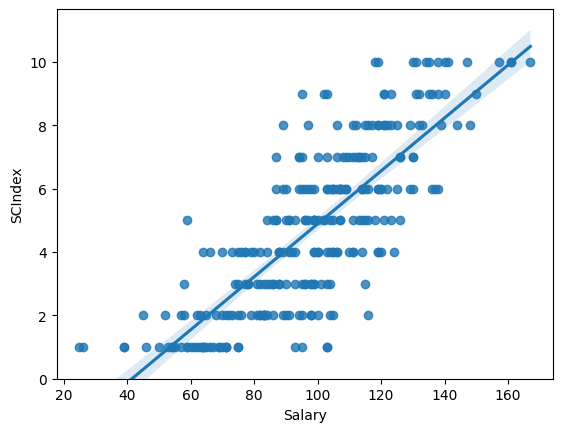

In [50]:
# create a regression plot comparing salary and SCIndex score
sns.regplot(x='Salary', y='SCIndex', data=social_climbers_df)
plt.ylim(0, None)
plt.show()

In [51]:
# Calculate the correlation coefficients between Salary, ScIndex
corr_matrix = social_climbers_df[['Salary', 'SCIndex']].corr()
print(corr_matrix)

           Salary   SCIndex
Salary   1.000000  0.796737
SCIndex  0.796737  1.000000


The regression plot and correlation coefficient value of `0.796737` clearly show a strong positive relationship between the salary of the couple and their social climber score. This means that as the salary of the couple increases, their concern for social status also increases. The correlation coefficient value of `0.796737` indicates a strong positive correlation between the two variables. This is further supported by the scatter plot, which shows a clear upward trend in the data points.



### Conclusion

Based on our analysis of the `Social Climbers` dataset, we can draw the following conclusions:

1. **Education level affects salary and savings**: There is a positive correlation between education level and yearly salary, indicating that couples with higher education levels tend to have higher yearly salaries. However, there is a negative correlation between education level and yearly savings, suggesting that couples with higher education levels may prioritize spending over saving.

2. **Higher salaries are associated with more cars and larger homes**: There is a positive correlation between salary and the value of cars and homes, indicating that couples with higher salaries tend to own more cars and have larger homes. However, the correlation between salary and home is weaker than the correlation between salary and cars.

3. **Higher education levels are associated with higher SCIndex scores**: The mean SCIndex increases with education level, indicating that couples with higher education levels are more likely to have higher Social Climbers Index (SCIndex) scores, reflecting a higher social status.

4. **Higher salaries are associated with higher SCIndex scores**: There is a strong positive correlation between the salary of the couple and their social climber score, indicating that as the salary of the couple increases, their concern for social status also increases.

These findings provide valuable insights into the social dynamics and lifestyle choices of couples based on their education level and salary. They highlight the importance of education and income in shaping social status and lifestyle choices.

Next, we will analyze the `Artsy Lawsuit` dataset to assess the validity of the discrimination lawsuit against Artsy Corporation.


# Artsy Lawsuit

Artsy Corporation is facing a lawsuit for sex discrimination in employment. The plaintiffs claim that Artsy discriminated against women in various aspects of their employment. <br>
By utilizing Artsy's hiring data, we will analyze the company's information regarding the discrimination lawsuit.<br><br>Our goal is to assess the validity of the case through statistical analysis of gender-based disparities in hiring and pay.

In [52]:
# Load the dataset
artsy_df = pd.read_csv('../data/artsy_lawsuit_solved.csv')

In [53]:
# Check the first few rows
print(artsy_df.head())

# Check the data types
print(artsy_df.dtypes)

# Check the summary statistics
print(artsy_df.describe())

   ID     RATE  GRADE  TinGRADE  SEX
0   1   865.38      2       1.5    0
1   2   819.90      4       0.5    0
2   3   675.00      2       1.5    0
3   4  1494.24      8       1.5    1
4   5   729.72      4       0.5    1
ID            int64
RATE        float64
GRADE         int64
TinGRADE    float64
SEX           int64
dtype: object
               ID         RATE       GRADE    TinGRADE         SEX
count  256.000000   256.000000  256.000000  256.000000  256.000000
mean   128.500000   930.846797    4.410156    1.731641    0.332031
std     74.045031   229.401327    2.233377    1.502095    0.471865
min      1.000000   578.760000    1.000000    0.000000    0.000000
25%     64.750000   761.550000    2.000000    0.500000    0.000000
50%    128.500000   866.130000    4.500000    1.500000    0.000000
75%    192.250000  1074.540000    7.000000    2.500000    1.000000
max    256.000000  1551.930000    8.000000    5.000000    1.000000


Our dataset contains 256 records. The data file consists of five fields separated by commas. Each row represents an employee at Artsy, with the following fields: <br><br>

1. **ID**: A unique identifier for each employee.
2. **RATE**: The pay rate for each employee.
3. **GRADE**: The job grade for each employee.
4. **TinGRADE**: The performance grade for each employee.
5. **SEX**: The gender of each employee, where `0` represents female and `1` represents male.

In [54]:
# box plot of pay rate by gender
fig = px.box(artsy_df, x='SEX', y='RATE', color='SEX', labels={'SEX': 'Gender', 'RATE': 'Pay Rate'})
fig.update_layout(xaxis={'tickvals': [0, 1], 'ticktext': ['Female', 'Male']})
fig.show()

We can observe from the box plot that there is a clear distinction between the pay grade of females and males. The median pay rate for females is `810`, whereas the median for males is `1153`. There are a few high pay rate anomalies for females.

In [55]:
# create a scatter plot to visualize pay rate vs. job grade colored by gender, where yellow is male and blue is female
fig = px.scatter(artsy_df, x='RATE', y='GRADE', color='SEX', labels={'GRADE': 'Job Grade', 'RATE': 'Pay Rate', 'SEX': 'Gender'})
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.show()

In the scatter plot, it is noticeable that the male demographic, depicted in yellow, tends to cluster towards higher job grades and higher salaries, which is represented in the top right quadrant of the plot. On the other hand, the female demographic, depicted in blue, appears to be more scattered across the left, center, and bottom half of the plot, indicating relatively lower job grades and pay rates compared to males.

The **t-stat** and **p-value** are statistical measures used to determine if there is a significant difference between the means of two groups. 

- `T-stat`: The `t-stat` is a measure of the difference between the means of two groups relative to the variation within each group. It is calculated by dividing the difference between the means of the two groups by the standard error of the difference.
- `P-value`: The `p-value` is a measure of the probability of obtaining a result as extreme as the actually observed result, assuming that there is no significant difference between the means of the two groups. In other words, it measures the evidence against the null hypothesis that there is no significant difference in mean pay rate between male and female employees.

In [56]:
male_pay = artsy_df[artsy_df['SEX'] == 1]['RATE']
female_pay = artsy_df[artsy_df['SEX'] == 0]['RATE']

t_stat, p_val = ttest_ind(male_pay, female_pay)

print('T-stat:', t_stat)
print('P-value:', p_val)

T-stat: 12.193089502296349
P-value: 3.1458173491705427e-27


In the context of the Artsy data, the `t-stat` is `12.19`. This indicates that the difference in mean pay rate between male and female employees is large relative to the variation within each group. <br> Additionally, in the context of the Artsy data, the `p-value` is `3.1458e-27`, which is extremely small. This suggests strong evidence against the null hypothesis and implies a significant difference in pay based on gender.

### Conclusion

Based on our analysis of the `Artsy Corporation`'s hiring data, there is strong evidence of gender-based disparities in pay. The data shows that female employees tend to have lower pay rates compared to their male counterparts. The median pay rate for females is significantly lower than that of males, and the scatter plot demonstrates a clear clustering of males towards higher job grades and salaries. <br><br>

Furthermore, the statistical analysis, including the t-statistic and p-value, supports the conclusion that the difference in mean pay rate between male and female employees is significant. The `t-stat` indicates a large difference relative to the variation within each group, and the very small `p-value` provides strong evidence against the null hypothesis of no significant difference in pay based on gender. <br><br>

These findings suggest that the plaintiffs in the discrimination lawsuit against Artsy Corporation have a valid case. The data supports their claims of gender-based disparities in pay.